In [1]:
import sys
import yaml
sys.path.append('..')

from src.train_gaze import *
from src.utils import *
from src.models.lightning_module import GazeLightningModule

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_path = "../configs/gaze_config.yaml"

with open(config_path, "r") as f:
    config = yaml.safe_load(f)

config["data"]["img_dir"] = "../" + config["data"]["img_dir"]
config["data"]["heatmap_dir"] = "../" + config["data"]["heatmap_dir"]
config["logging"]["checkpoint_dir"] = "../" + config["logging"]["checkpoint_dir"]

_, val_loader = get_dataloaders(config)
ckpt = glob.glob(os.path.join(config["logging"]["checkpoint_dir"], "UNET", "*.ckpt"))[0]

model = GazeLightningModule.load_from_checkpoint(ckpt)

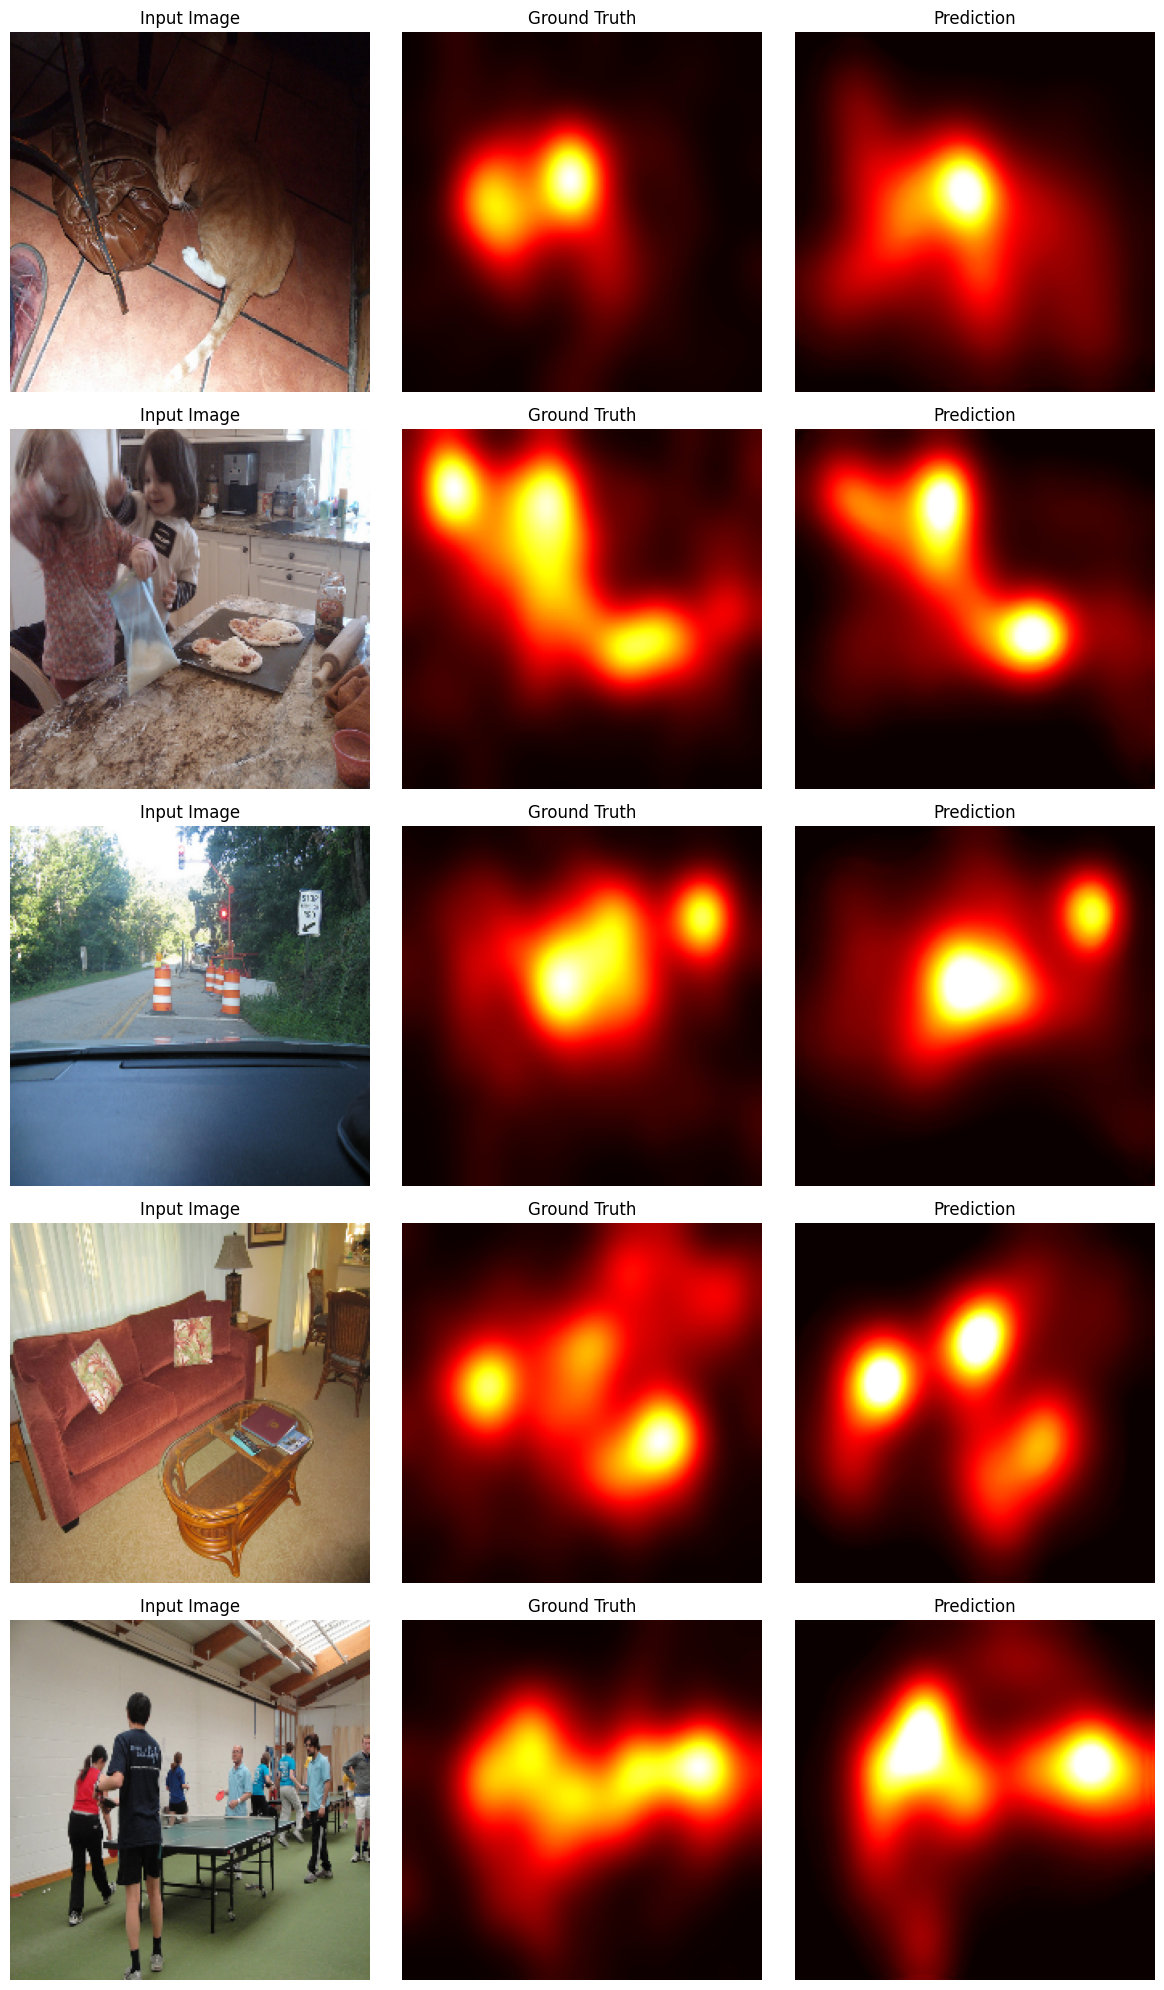

In [3]:
model.to('cpu')
model.eval()
for batch in val_loader:
    images, gts = batch
    predictions = model(images)
    visualize_predictions(images[:5, :, :, :], gts[:5, :, :, :], predictions[:5, :, :, :], num_samples=5)
    break